In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import f1_score,r2_score

In [2]:
app_data=pd.read_csv('application_record.csv')
credit_data=pd.read_csv('credit_record.csv')

In [3]:
app_data.fillna('Other',inplace=True)
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
app_data['ID']=str(app_data['ID'])
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  object 
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
app_data['ID'] = app_data['ID'].str.strip()

In [7]:
app_data['DAYS_EMPLOYED'].value_counts()

 365243    75329
-218         262
-1678        251
-249         241
-978         240
           ...  
-13529         1
-10223         1
-8917          1
-11429         1
-8105          1
Name: DAYS_EMPLOYED, Length: 9406, dtype: int64

In [8]:
def res(no):
    if no >= 0:
        no = 0
    else:
        no=no*-1
    return no

In [9]:
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].apply(res)
app_data['DAYS_EMPLOYED'].value_counts()

0        75329
218        262
1678       251
249        241
978        240
         ...  
13529        1
10223        1
8917         1
11429        1
8105         1
Name: DAYS_EMPLOYED, Length: 9406, dtype: int64

In [10]:
app_data.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [11]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [12]:
credit_data['Label']= (credit_data['STATUS']=='X') | (credit_data['STATUS']=='C') | (credit_data['STATUS']=='0') | (credit_data['STATUS']=='1')
credit_data['Label']=credit_data['Label'].apply(lambda x: bin(x)[2:])
credit_data['Label'].value_counts()

1    1045471
0       3104
Name: Label, dtype: int64

In [13]:
def count_good_bad(status_series):
    count_good=status_series.eq('0').sum()
    count_bad=status_series.ne('0').sum()
    return count_good,count_bad

In [14]:
agg_data=credit_data.groupby('ID')['Label'].apply(count_good_bad)
#agg_data=pd.DataFrame(agg_data)
#agg_data.rename(columns=agg_data.columns[[0,1]],inplace=True)
agg_data.head()

ID
5001711     (0, 4)
5001712    (0, 19)
5001713    (0, 22)
5001714    (0, 15)
5001715    (0, 60)
Name: Label, dtype: object

In [15]:
agg_data=pd.DataFrame(agg_data)

In [16]:
x , y = zip(*agg_data['Label'])

In [17]:
split_series=pd.DataFrame({'NO_OF_BAD':x,'NO_OF_GOOD':y})
print(split_series)

       NO_OF_BAD  NO_OF_GOOD
0              0           4
1              0          19
2              0          22
3              0          15
4              0          60
...          ...         ...
45980          0          18
45981          0          18
45982          0          13
45983          0           2
45984          0          30

[45985 rows x 2 columns]


In [18]:
agg_data['NO_OF_GOOD'] = x
agg_data['NO_OF_BAD'] = y
agg_data.drop('Label',axis=1,inplace=True)
agg_data

,NO_OF_GOOD,NO_OF_BAD
ID,,
5001711,0,4
5001712,0,19
5001713,0,22
5001714,0,15
5001715,0,60
...,...,...
5150482,0,18
5150483,0,18
5150484,0,13


In [37]:
agg_data['NO_OF_GOOD'] = y
agg_data['NO_OF_BAD'] = x
agg_data

,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL
ID,,,
5001711,4,0,0
5001712,19,0,0
5001713,22,0,0
5001714,15,0,0
5001715,60,0,0
...,...,...,...
5150482,18,0,0
5150483,18,0,0
5150484,13,0,0


In [20]:
def res(no):
    if no < 1:
        no = 0
    if no > 1:
        no = 1 
    return no

In [21]:
agg_data['FINAL_LABEL'] = agg_data['NO_OF_BAD'].apply(res)

In [22]:
agg_data['FINAL_LABEL'].value_counts()

0    45318
1      667
Name: FINAL_LABEL, dtype: int64

In [23]:
app_data['DAYS_BIRTH']=app_data['DAYS_BIRTH']/365
app_data['DAYS_EMPLOYED']=app_data['DAYS_EMPLOYED']/365
agg_data

,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL
ID,,,
5001711,4,0,0
5001712,19,0,0
5001713,22,0,0
5001714,15,0,0
5001715,60,0,0
...,...,...,...
5150482,18,0,0
5150483,18,0,0
5150484,13,0,0


In [24]:
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0 5008804\n1 5008805\n2 ...,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.890411,12.443836,1,1,0,0,Other,2.0
1,0 5008804\n1 5008805\n2 ...,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.890411,12.443836,1,1,0,0,Other,2.0
2,0 5008804\n1 5008805\n2 ...,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-58.832877,3.106849,1,0,0,0,Security staff,2.0
3,0 5008804\n1 5008805\n2 ...,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-52.356164,8.358904,1,0,1,1,Sales staff,1.0
4,0 5008804\n1 5008805\n2 ...,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-52.356164,8.358904,1,0,1,1,Sales staff,1.0


In [26]:
#agg_data=app_data[['DAYS_BIRTH','DAYS_EMPLOYED']].copy()
agg_data

,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL
ID,,,
5001711,4,0,0
5001712,19,0,0
5001713,22,0,0
5001714,15,0,0
5001715,60,0,0
...,...,...,...
5150482,18,0,0
5150483,18,0,0
5150484,13,0,0


In [27]:
agg_data[['DAYS_BIRTH','DAYS_EMPLOYED']] = app_data[['DAYS_BIRTH', 'DAYS_EMPLOYED']].copy()
agg_data

,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL,DAYS_BIRTH,DAYS_EMPLOYED
ID,,,,,
5001711,4,0,0,NaN,NaN
5001712,19,0,0,NaN,NaN
5001713,22,0,0,NaN,NaN
5001714,15,0,0,NaN,NaN
5001715,60,0,0,NaN,NaN
...,...,...,...,...,...
5150482,18,0,0,NaN,NaN
5150483,18,0,0,NaN,NaN
5150484,13,0,0,NaN,NaN


In [31]:
agg_data.loc[:, 'DAYS_BIRTH'] = app_data.loc[:, 'DAYS_BIRTH']
agg_data.loc[:, 'DAYS_EMPLOYED'] = app_data.loc[:, 'DAYS_EMPLOYED']
agg_data

,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL,DAYS_BIRTH,DAYS_EMPLOYED
ID,,,,,
5001711,4,0,0,NaN,NaN
5001712,19,0,0,NaN,NaN
5001713,22,0,0,NaN,NaN
5001714,15,0,0,NaN,NaN
5001715,60,0,0,NaN,NaN
...,...,...,...,...,...
5150482,18,0,0,NaN,NaN
5150483,18,0,0,NaN,NaN
5150484,13,0,0,NaN,NaN


In [34]:
agg_data.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis=1,inplace=True)
agg_data

,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL
ID,,,
5001711,4,0,0
5001712,19,0,0
5001713,22,0,0
5001714,15,0,0
5001715,60,0,0
...,...,...,...
5150482,18,0,0
5150483,18,0,0
5150484,13,0,0


In [68]:
credit_data = credit_data.merge(app_data,how='inner',on=['ID'],indicator=False)
credit_data

,MONTHS_BALANCE,STATUS,Label,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL,CODE_GENDER_x,FLAG_OWN_CAR_x,FLAG_OWN_REALTY_x,CNT_CHILDREN_x,...,NAME_FAMILY_STATUS_y,NAME_HOUSING_TYPE_y,DAYS_BIRTH_y,DAYS_EMPLOYED_y,FLAG_MOBIL_y,FLAG_WORK_PHONE_y,FLAG_PHONE_y,FLAG_EMAIL_y,OCCUPATION_TYPE_y,CNT_FAM_MEMBERS_y


In [51]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   NO_OF_GOOD      1048575 non-null  int64 
 2   NO_OF_BAD       1048575 non-null  int64 
 3   FINAL_LABEL     1048575 non-null  int64 
 4   MONTHS_BALANCE  1048575 non-null  int64 
 5   STATUS          1048575 non-null  object
 6   Label           1048575 non-null  object
dtypes: int64(5), object(2)
memory usage: 64.0+ MB


In [52]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  object 
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  float64
 11  DAYS_EMPLOYED        438557 non-null  float64
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [59]:
app_data['ID'] = pd.to_numeric(app_data['ID'])

In [61]:
new = new.drop_duplicates(subset=['ID'])
new

,ID,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL,MONTHS_BALANCE,STATUS,Label
0,5001711,4,0,0,0,X,1
4,5001712,19,0,0,0,C,1
23,5001713,22,0,0,0,X,1
45,5001714,15,0,0,0,X,1
60,5001715,60,0,0,0,X,1
...,...,...,...,...,...,...,...
1048494,5150482,18,0,0,-11,C,1
1048512,5150483,18,0,0,0,X,1
1048530,5150484,13,0,0,0,C,1
1048543,5150485,2,0,0,0,0,1


In [66]:
new = credit_data.merge(app_data,how='inner',on=['ID'],indicator=False)
new

,ID,MONTHS_BALANCE,STATUS,Label,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


In [69]:
a_data=pd.read_csv('application_record.csv')
c_data=pd.read_csv('credit_record.csv')
a_data=a_data.merge(c_data,on=['ID'],how='inner',indicator=False)
a_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [70]:
a_data=a_data.merge(agg_data,on=['ID'],how='inner',indicator=False)
a_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,0,C,16,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,-1,C,16,0,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,-2,C,16,0,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,-3,C,16,0,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,-4,C,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-9,0,13,1,1
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-10,2,13,1,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-11,1,13,1,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-12,0,13,1,1


In [74]:
a_data.fillna('Other',inplace=True)

In [75]:
a_data.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
NO_OF_GOOD             0
NO_OF_BAD              0
FINAL_LABEL            0
dtype: int64

In [79]:
a_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 777701
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null

In [78]:
a_data.drop_duplicates(subset=['ID'],inplace=True)
a_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,0,C,16,0,0
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,0,C,15,0,0
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,C,30,0,0
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,5,0,0
66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,-22,X,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Managers,2.0,0,5,8,4,1
777634,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,0,C,13,11,1
777658,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,0,C,22,11,1
777691,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Sales staff,2.0,0,2,9,1,1


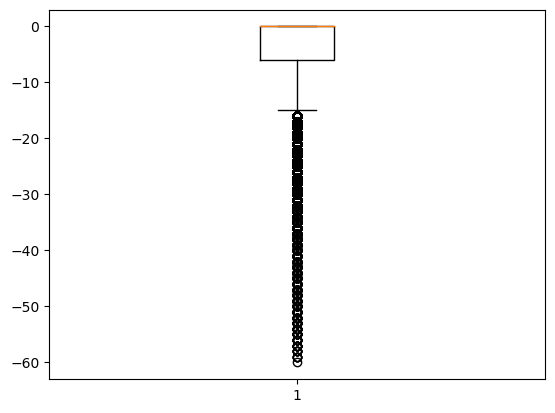

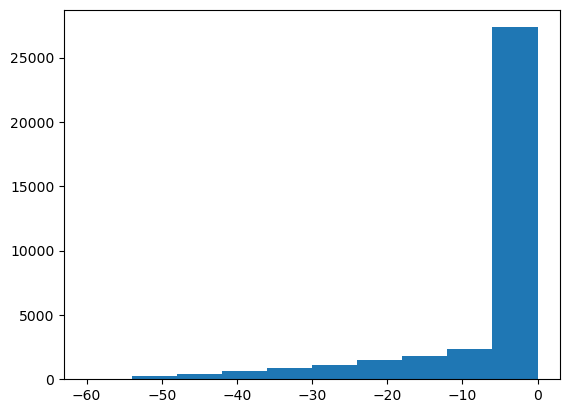

In [90]:
plt.boxplot(a_data['MONTHS_BALANCE'])
plt.show()
plt.hist(a_data['MONTHS_BALANCE'])
plt.show()

In [100]:
cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_EMPLOYED','DAYS_BIRTH','CNT_FAM_MEMBERS','MONTHS_BALANCE']
#
for col in cols:
    q1 = a_data[col].quantile(0.25)
    q3 = a_data[col].quantile(0.75)
    iqr = q3 - q1
    l = q1 - 1.5 * iqr
    u = q3 + 1.5 * iqr
    f_data = a_data[~((a_data[col]<l) | (a_data[col]>u))]
f_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,0,C,16,0,0
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,0,C,15,0,0
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,C,30,0,0
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,5,0,0
71,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,C,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Managers,2.0,0,5,8,4,1
777634,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,0,C,13,11,1
777658,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,0,C,22,11,1
777691,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Sales staff,2.0,0,2,9,1,1


In [101]:
import csv

In [106]:
f_data.to_csv('FINAL_DATASET.csv',index=False)

In [107]:
data=pd.read_csv('FINAL_DATASET.csv')
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,NO_OF_GOOD,NO_OF_BAD,FINAL_LABEL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,0,C,16,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,0,C,15,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,C,30,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,5,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,C,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Managers,2.0,0,5,8,4,1
30692,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,0,C,13,11,1
30693,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,0,C,22,11,1
30694,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Sales staff,2.0,0,2,9,1,1
